<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/Estudando_os_dados_da_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Estudando os dados da COVID-19*

O conceito de análise de dados sempre esteve presente em nosso cotidiano, mostrando sua importância e impacto em nossas vidas, essa ferramenta fundamental se faz mais que presente nesse cenário obscuro que é a pandemia, utilizado em diferentes veículos de comunicação, praticamente durante todo o dia estamos em contato com insights estatísticos que pode trazer cenários quantitativos da situação em que estamos vivendo.

 O acompanhamento e evolução do COVID-19 em nível global, funcionando como uma bussola onde os indicadores têm a função de nos comunicar e orientar, trazendo um viés comparativo entre espaço e tempo em relação ao controle desse caos.



<p align="center">
  <img src="https://lh5.googleusercontent.com/w2TASSUzyk8hkHNjl1D6gG1wLVe4hAPq2wK0vjUPs_0Qk6A6KwSMCqDGZMjleJk7FwR_gTdfrnFP44Gb4QKdkIHrgjnuPQTOvOMR3BqszlxSvGWAqsRLQkj-98_OumoAQhCXOBXy" >
</p>
<iframe src= width="640" height="480"></iframe>


No entanto dia após dia recebemos novas cargas de dados em relação ao COVID-19 aumentando o volume das bases de dados, amadurecendo a informação tornando-a mais precisa para que possamos absorver mais conhecimento sobre o inimigo que estamos enfrentando.


E com intuito de explorar essas informações, através de um estudo com base na ciência dos dados, estaremos realizando abordagens em relação do tempo, com métricas de evolução entre países e continentes procurando passar de forma intuitiva insights em nível global, e estratificando em maior nível de detalhes o Brasil compreendendo as proporções entre a quantidade de casos confirmados, e o número de óbitos por COVID-19 e o andamento das vacinas.

##Obtenção de dados
Como o Brasil ainda passa por uma fase de amadurecimento, quanto a compartilhamento de dados abertos de forma que os mesmos sejam confiáveis, e factivel com uma grande prossimidade de um cenário real. Para esse estudo optei por utilizar a base de dados [Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Align+outbreaks=false&country=USA~GBR~CAN~DEU~ITA~IND) principalmente pelo fato de possuir informações em nivel global, sendo possivel comparar o poscionamento em relação a diferentes paises e continentes. Essa plataforma de dados opensource é utilizada por grandes canais de comunicação e entre universidades renomadas para exercicios de pesquisa cientifica. 

## Dicionário das variáveis

* `iso_code` - Abreviação de 3 letras do país conforme ISO 3166-1
* `continent` - Localização geográfica continente
* `location` -  Localização geográfica
* `date` - Data de observação
* `new_cases` - Novos casos confirmados
* `new_deaths` - Novas mortes atribuidas como COVID-19
* `people_vaccinated`- Pessoas Vacinadas
* `median_age` - Média de Idade




## Importando os dados

 O link de acesso a base de dados que será utilizado nesse projeto https://covid.ourworldindata.org/data/owid-covid-data.csv com arquivo em formato **CSV** onde estaremos importando todas as variáveis mapeadas conforme a lista no dicionário.

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Análise exploratória dos dados / Exploratory data analysis (EDA)

Estaremos iniciando o nosso estudo partindo do principio da exploração e analise dos dados, para que possamos tomar conhecimento das informações que são possiveis extrair para gerar a informação. Nessa etapa estaremos identificando as dimensões do `database` e qual o tratamento necéssario para as variáveis identificando possiveis fragilidades que podem enviesar nossas analises, trazendo insights com falsos resultados impactando diretamente nas conclusões que podem ser tomadas no estudo em foco. 

### Análise exploratoria dos dados (Nível global)

Primeiramente partiremos da analise em nível global, compreendendo mais a fundo a representatividade e distribuição em relação as entradas da variável `location` tomando como referência analises comparativas, em proximidade com números de fontes externas de outros estudos que utilizaram a mesma base. 

In [ ]:
#Importando Dataframe e Visualisando as últimas 5 entradas / Dimensões do Database

col = ['iso_code','continent','location','date','new_cases','new_deaths',
       'people_vaccinated','median_age']

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',usecols= col)
print('Qtd.de Entradas - >',df.shape[0])
print('Qtd.de Variáveis ->',df.shape[1])
df.tail()

Qtd.de Entradas - > 94657
Qtd.de Variáveis -> 8


,iso_code,continent,location,date,new_cases,new_deaths,people_vaccinated,median_age
94652,ZWE,Africa,Zimbabwe,2021-06-05,24.0,0.0,686636.0,19.6
94653,ZWE,Africa,Zimbabwe,2021-06-06,21.0,1.0,687321.0,19.6
94654,ZWE,Africa,Zimbabwe,2021-06-07,49.0,5.0,688696.0,19.6
94655,ZWE,Africa,Zimbabwe,2021-06-08,83.0,6.0,689397.0,19.6
94656,ZWE,Africa,Zimbabwe,2021-06-09,111.0,5.0,689920.0,19.6


In [ ]:
# Explorando as entradas da variável 'location' 

print(df.groupby('location')['new_cases'].sum().sort_values(ascending= False)[:10])

print('\n Total de casos registrados ->',df.new_cases.sum())

location
World             173943296.0
Asia               52086488.0
Europe             47639664.0
North America      39157604.0
United States      33411892.0
European Union     32785324.0
South America      30046084.0
India              29182532.0
Brazil             17122877.0
France              6135792.0
Name: new_cases, dtype: float64

 Total de casos registrados -> 554614491.0


Como podemos observar ainda que a base de dados seja de uma fonte extremamente confiável, se faz necessário um tratamento para identificar possiveis fragilidades como o número de entradas registrado como continente dentro da variável `location` sendo contabilizado de forma duplicada, pois como sabemos que os registros dessa variável é formado por paises, os mesmos já estão sendo contabilizados por si proprio. 

In [ ]:
# Removendo as entradas indevidas da variável 'location' 

df_global = df.loc[(df.location!='World') & (df.location!='Asia') & (df.location!='Europe') & (df.location!='North America') & (df.location!='South America') & (df.location!='Oceania') & (df.location!='Africa') & (df.location!='European Union')]  
print(df_global.groupby('location')['new_cases'].sum().sort_values(ascending= False)[:10])

print('\n Total de casos registrados ->',df_global.new_cases.sum())

location
United States     33411892.0
India             29182532.0
Brazil            17122877.0
France             6135792.0
Russia             5096657.0
United Kingdom     4551694.0
Turkey             4483465.0
Italy              4237790.0
Argentina          4038528.0
Germany            3715870.0
Name: new_cases, dtype: float64

 Total de casos registrados -> 173943296.0


In [ ]:
# Qtd. de entradas de casos duplicados

df.new_cases.sum()-df_global.new_cases.sum()

380671195.0

Essa etapa que normalmente não fica a exposição, porém é de extrema e fundamental importancia pois conforme a equação acima estamos pontuando **3 M de registros** a mais que poderia levar a uma conclusão errada. 

In [ ]:
#Identificando os formatos das variáveis

df_global.dtypes

iso_code              object
continent             object
location              object
date                  object
new_cases            float64
new_deaths           float64
people_vaccinated    float64
median_age           float64
dtype: object

In [ ]:
#  Connversão do tipo da variável 'date' para (datetime) 
df_global.date = pd.to_datetime(df_global.date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Analisando as entradas dos dados ausentes, chegamos a conclusão que para as variáveis `people_vaccinated` e `new_deaths` será adotodo o preencimento com o número zero, comprendendo que se trata de uma analise qualitativa, onde os registros dos campos não foram preenchidos pois não houve registros, e a intenção seria pontuar que aquela informção não é aplicavel para essa entrada. E quanto aos valores inferiores a 10% entendemos que para o estudo que está sendo realizado não havera impacto, pois não estaremos trabalhando com nenhum modelo em análise preditiva. 



In [ ]:
#Porcentagem de dados ausentes

(df_global.isnull().sum()/df_global.shape[0]*100).sort_values(ascending=False)

people_vaccinated    86.915908
new_deaths           14.240970
median_age            7.011856
new_cases             3.419906
continent             0.539289
date                  0.000000
location              0.000000
iso_code              0.000000
dtype: float64

### Evolução em função do tempo registros de novos casos e obitos
O acompanhamento em função do tempo nos mostra a evolução da pandemia, com inutiuto de nos dar um norte quanto a tendência no espaço tempo identificando possiveis tendências ascendente ou decrescente, através dos números de registro que são atualizados diariamente na base de dados, podendo ser acompanhado com aplicações estátisticas como as análies de variação de intervalo da média.


O intervalo em dias considerado para o racional da média dos últimos 14 dias (média móvel) está seguindo por base duas semanas, conforme estudos que determinam esse periodo como tempo de incubação da doença, tornando a informação mais próxima de uma contagem real.

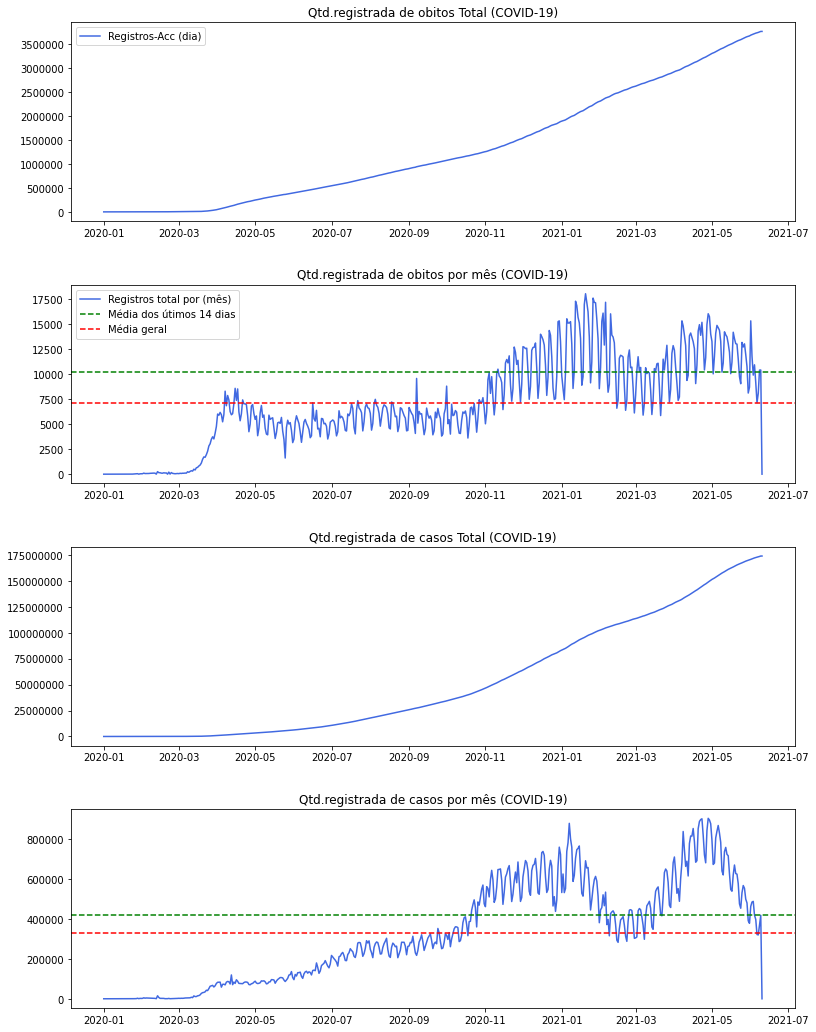

In [ ]:
# Gráficos de evolução da COVID-19 no  decorrer do tempo

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)  


fig, ax= plt.subplots(4,1,figsize=(12,15))

#Avg. Móvel considerando 14 dias

inter_day = df_global[(df_global['date']>'2021-05-27') &
          (df_global['date']<='2021-06-09')]

cas_avgmov =  inter_day.groupby('date')['new_cases'].sum().mean() 
deat_avgmov =  inter_day.groupby('date')['new_deaths'].sum().mean()     

x = df_global.groupby('date')['new_deaths'].sum()
z = df_global.groupby('date')['new_cases'].sum()
y = x.keys()


ax[0].plot(y,x.cumsum(), label= 'Registros-Acc (dia)', color ='royalblue')

ax[1].plot(y,x, label= 'Registros total por (mês)', color ='royalblue')
ax[1].axhline(y=deat_avgmov, color='g' , linestyle='--', label= 'Média dos útimos 14 dias')
ax[1].axhline(y=x.mean(), color='r' , linestyle='--', label= 'Média geral')


ax[2].plot(y,z.cumsum(), label= 'Registros-Acc (dia)', color ='royalblue')

ax[3].plot(y,z, label= 'Registros total por (mês)', color ='royalblue')
ax[3].axhline(y=cas_avgmov, color='g' , linestyle='--', label= 'Média dos útimos 14 dias')
ax[3].axhline(y=z.mean(), color='r' , linestyle='--', label= 'Média geral')

ax[0].set_title("Qtd.registrada de obitos Total (COVID-19)", fontsize= 12)
ax[1].set_title("Qtd.registrada de obitos por mês (COVID-19)", fontsize= 12)

ax[2].set_title("Qtd.registrada de casos Total (COVID-19)", fontsize= 12)
ax[3].set_title("Qtd.registrada de casos por mês (COVID-19)", fontsize= 12)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax[0].legend()
ax[1].legend()

plt.tight_layout(pad= 3.08)

In [ ]:
# Variação entre Média geral x Média dos últimos 14 dias

print('Total de obtitos por (COVID-19)\n\nAcc.registrado de obitos (COVID-19)->',x.cumsum().max())
print('Média mov. útimos 14 dias ->',deat_avgmov)
print('Média geral ->',x.mean())
print('Proporção (%) ->',(x.mean()/deat_avgmov)*100//1,'\n\n\n')

print('Qtd.registrada de casos confirmados (COVID-19)\n\nAcc.registrado de casos (COVID-19) ->',z.cumsum().max())
print('Média mov. útimos 14 dias ->',cas_avgmov)
print('Média geral ->',z.mean())
print('Proporção (%) ->',(z.mean()/cas_avgmov)*100//1,'\n')


Total de obtitos por (COVID-19)

Acc.registrado de obitos (COVID-19)-> 3757774.0
Média mov. útimos 14 dias -> 10213.384615384615
Média geral -> 7130.500948766604
Proporção (%) -> 69.0 



Qtd.registrada de casos confirmados (COVID-19)

Acc.registrado de casos (COVID-19) -> 173943296.0
Média mov. útimos 14 dias -> 418381.1538461539
Média geral -> 330063.18026565464
Proporção (%) -> 78.0 



Analisando as variações e proporções das médias podemos observar uma **tendência ascendente** entre as duas métricas, considerando a média movél em relação a média geral temos percentuais **acima de 50%** confirmando a curva que se forma no gráfico.

### Estratificando os dados 

Para compreender a representatividade no que tange as metricas de `new_cases` e `new_deaths` estaremos estratificando os nossos dados, analisando os locais de maior concentração dos reflexos da pandemia, abrindo os niveis de continentes e países.

In [ ]:
# Distribuição de registros 'new_cases' e 'new_deaths' por continente

print("Total  de casos registrados: \n\n",df_global.groupby('continent')['new_cases'].sum().sort_values(ascending= False),"\n\n")
print("Total  de mortes registradas: \n\n",df_global.groupby('continent')['new_deaths'].sum().sort_values(ascending= False),"\n\n")

# Proporção entre os registros 'new_deaths' por 'new_cases'

conti = ((df_global.groupby('continent')['new_deaths'].sum())/(df_global.groupby('continent')['new_cases'].sum())).sort_values(ascending= False)*100
print("Proporção (%) new_deaths x new_cases  registrados: \n\n",conti/conti.sum()*100)

Total  de casos registrados: 

 continent
Asia             52086488.0
Europe           47639664.0
North America    39157604.0
South America    30046084.0
Africa            4962319.0
Oceania             50416.0
Name: new_cases, dtype: float64 


Total  de mortes registradas: 

 continent
Europe           1085022.0
South America     928207.0
North America     889399.0
Asia              720666.0
Africa            133360.0
Oceania             1105.0
Name: new_deaths, dtype: float64 


Proporção (%) new_deaths x new_cases  registrados: 

 continent
South America    22.223450
Africa           19.332830
Europe           16.384167
North America    16.339360
Oceania          15.766976
Asia              9.953217
dtype: float64


Conforme a informação acima podemos concluir que a quantidade de casos confirmado, não está necessariamente relacionado ao número de obitos para cada continente. Pois levando em consideração que o continente **Asiático** que apresenta a maior proporção para casos confirmados, está em **4ºlugar** entre o número de registros de obitos. E buscando melhor compreensão dos continetes com maior criticidade, olhando pelo ponto de vista de controle da doença temos a visão de **Proporção (%) new_deaths x new_cases** mostrando que **41% dos obitos representa** os continentes `South America` e `Africa` confirmando que ainda que haja poucos registros, eles levaram a óbito.

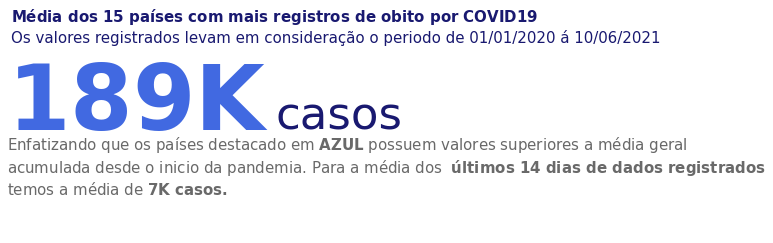

In [ ]:
# TOP 15 países Média acumulada de registro de obito desde o inicio da pandemia 


a = df_global.groupby('location')['new_deaths'].sum().sort_values(ascending=False)[0:15]
b = df_global[(df_global['date']>'2021-05-27') &
          (df_global['date']<='2021-06-09') ].groupby('location')['new_deaths'].sum().sort_values(ascending=False)[0:15]

BLUE1, GRAY, BLUE2 = 'royalblue','midnightblue', 'dimgrey'


# Texto principal
plt.text(-0.15, 0.49,
         '$\\bf{\}$'+str(int(a.mean()//1000))+'K',
         fontsize = 90,
         color = BLUE1)

# Texto complemento
plt.text(0.65, 0.49,
         'casos',
         fontsize = 45,
         color = GRAY)

# 1 Sub-Texto 
plt.text(-0.14, 0.89,
         '$\\bf{Média\ dos\ 15\ países\ com\ mais\ registros\ de\ obito\ por\ COVID 19}$\nOs valores registrados levam em consideração o periodo de '
         +str(pd.to_datetime(df_global.date.min()).strftime('%d/%m/%Y'))+' á '+str(pd.to_datetime(df_global.date.max()).strftime('%d/%m/%Y')),
         fontsize = 15,
         color = GRAY)

# 2 Sub-Texto 
plt.text(-0.15, 0.19,         
         '\nEnfatizando que os países destacado em $\\bf{AZUL}$ possuem valores superiores a média geral \nacumulada desde o inicio da pandemia. Para a média dos  $\\bf{últimos\ 14\ dias\ de\ dados\ registrados}$\ntemos a média de ''$\\bf{\}$'+
         str(int(b.mean()//1000))+'K casos.',
         fontsize = 15,
         color = BLUE2)

# Removendo os axis
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
for spine in plt.gca().spines.values():
  spine.set_visible(False)

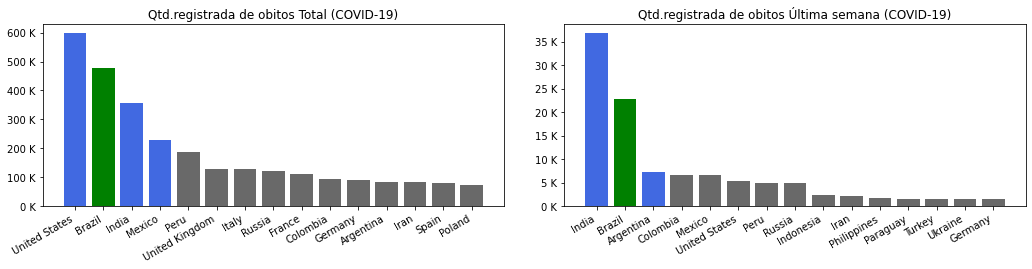

In [ ]:
# Plotando o cenário dos registros dos 15 países com maior concentração de 'new_cases' e 'new_deaths' estratificando 

fig, ax=plt.subplots(1,2,figsize=(15,4))

colors = ['green' if (bar==a[:2].min()) else 'royalblue' if (bar >= a.mean())  else 'dimgrey'  for bar in a ]
colors2 = ['green' if (bar==b[:2].min()) else 'royalblue' if (bar >= b.mean())  else 'dimgrey'  for bar in b ]

ax[0].bar(a.keys(),a/1000,color = colors)
ax[1].bar(b.keys(),b/1000,color = colors2)

ax[0].set_title("Qtd.registrada de obitos Total (COVID-19)", fontsize= 12)
ax[1].set_title("Qtd.registrada de obitos Última semana (COVID-19)", fontsize= 12)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%1.0f K'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%1.0f K'))



plt.tight_layout(pad= 3.08)
fig.autofmt_xdate()


O gráfico dos top 15 países com registro de óbitos nos mostra na gestão de cores os países destacados em azul com valores acima da média de 189K registros, podendo ser observado que no cenário acumulado desde o inicio da pandemia temos a maior concentração para os EUA, Brasil, Índia e México o que valida a hipótese de concentração de continentes com maior representatividade para Proporção (%) new_deaths x new_cases sendo o continente South_America somando (Brasil e México) temos uma concentração maior do que 7 países do continente Europe.
E acompanhando o último status atualizado do intervalo dos últimos 14 dias de dados registrados, podemos notar que os países acima da média de 7K registros de óbito está a Índia mantendo registros altos, e logo atrás o Brasil também acima da média, mantendo a mesma posição no cenário acumulado como 2º país com maior índice de óbitos desde o inicio da pandemia. E dentro da linha dos países acima da média a Argentina somando a concentração do continente South_America.

##Histograma - Faixa etária dos 15 países com mais registros
Na distribuição de frequência de casos confirmados por idade, teremos um histograma formado por **dados multi-moldais**, formada por dois picos, com maior concentraçaõ para o priemiro grupo na faixa etária de **18 até 30 anos** e para o segundo grupo que está na faixa etária de **40 até 50 anos** colocando a prova pautas que são constantemente destacadas em meio aos canais de comunicação, sinalizando que os mais jovens acabam levando a doença para casa contaminando os familiares mais velhos.

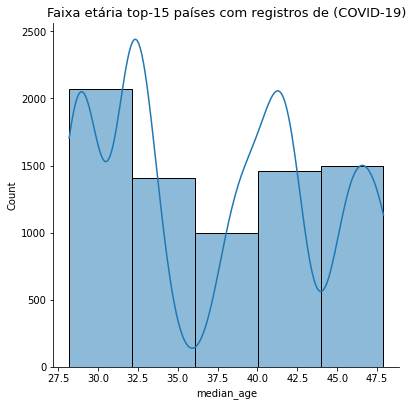

In [ ]:
# Distribuição de frequência de casos confirmados por idade

top_15 = df_global.loc[df_global['location'].isin(['United States', 'Brazil','India','Mexico','Peru','United Kingdom', 'Italy','Russia','France','Colombia','Germany','Argentina','Iran','Spain','Poland'])]
sns.displot(top_15, x='median_age', kde=True, bins=5,height=6.3);

plt.title("Faixa etária top-15 países com registros de (COVID-19)", fontsize= 13)


plt.tight_layout(pad= 3.08, h_pad= 1.08)



## Explorando os dados do Brasil 
Observando a posição preocupante do Brasil desde o inicio da pandemia, se mantendo entre os lugares de maior concentração da doença, quando acompanhamos os números que não estabilizam e demonstram uma lentidão no controle e combate da doença, oscilando e aumentando os registros de `new_cases` e `new_deaths` estaremos estratificando mais um nível para compreender a posição e tendência dos números atuais que refletem o pais.





In [ ]:
#Filtrando apenas dados do Brasil

df_br = df_global[df_global['location']=='Brazil']
df_br.tail(5)

,iso_code,continent,location,date,new_cases,new_deaths,people_vaccinated,median_age
12515,BRA,South America,Brazil,2021-06-05,66017.0,1689.0,48576572.0,33.5
12516,BRA,South America,Brazil,2021-06-06,39637.0,873.0,48802098.0,33.5
12517,BRA,South America,Brazil,2021-06-07,37156.0,1010.0,NaN,33.5
12518,BRA,South America,Brazil,2021-06-08,52911.0,2378.0,NaN,33.5
12519,BRA,South America,Brazil,2021-06-09,85748.0,2723.0,51465240.0,33.5


Plotando os gráficos de evolução da pandemia estratificando apenas informações do Brasil podemos obter uma breve compreensão do cenário em que o país se encontra, estando sempre entre os locais que estão acima da média para gestão de `new_casos` e `new_deaths`.

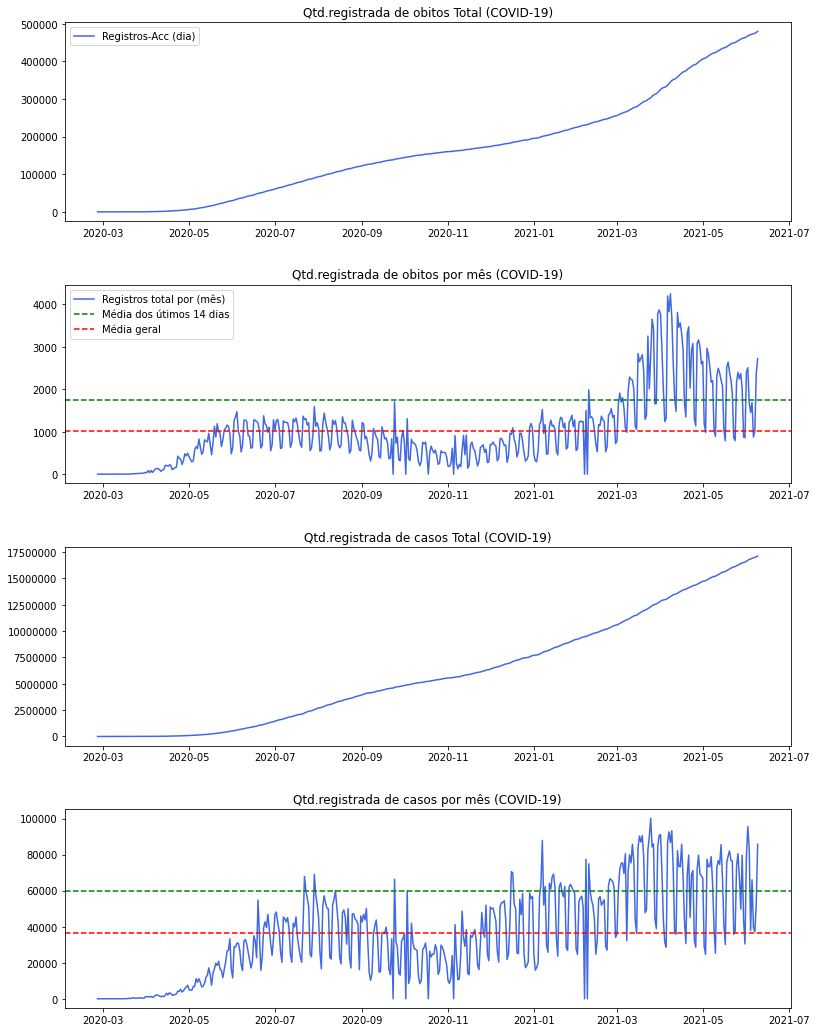

In [ ]:
# Gráficos de evolução da COVID-19 no Brasil decorrer do tempo

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)  


fig, ax2= plt.subplots(4,1,figsize=(12,15))

#Avg. Móvel considerando 14 dias

inter_daybr = df_br[(df_br['date']>'2021-05-27') &
          (df_br['date']<='2021-06-09')]

cas_avgmovbr =  inter_daybr.groupby('date')['new_cases'].sum().mean() 
deat_avgmovbr =  inter_daybr.groupby('date')['new_deaths'].sum().mean()     

xbr = df_br.groupby('date')['new_deaths'].sum()
zbr = df_br.groupby('date')['new_cases'].sum()
ybr = xbr.keys()


ax2[0].plot(ybr,xbr.cumsum(), label= 'Registros-Acc (dia)', color ='royalblue')

ax2[1].plot(ybr,xbr, label= 'Registros total por (mês)', color ='royalblue')
ax2[1].axhline(y=deat_avgmovbr, color='g' , linestyle='--', label= 'Média dos útimos 14 dias')
ax2[1].axhline(y=xbr.mean(), color='r' , linestyle='--', label= 'Média geral')


ax2[2].plot(ybr,zbr.cumsum(), label= 'Registros-Acc (dia)', color ='royalblue')

ax2[3].plot(ybr,zbr, label= 'Registros total por (mês)', color ='royalblue')
ax2[3].axhline(y=cas_avgmovbr, color='g' , linestyle='--', label= 'Média dos útimos 14 dias')
ax2[3].axhline(y=zbr.mean(), color='r' , linestyle='--', label= 'Média geral')

ax2[0].set_title("Qtd.registrada de obitos Total (COVID-19)", fontsize= 12)
ax2[1].set_title("Qtd.registrada de obitos por mês (COVID-19)", fontsize= 12)

ax2[2].set_title("Qtd.registrada de casos Total (COVID-19)", fontsize= 12)
ax2[3].set_title("Qtd.registrada de casos por mês (COVID-19)", fontsize= 12)

ax2[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2[2].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax2[0].legend()
ax2[1].legend()

plt.tight_layout(pad= 3.08)

In [ ]:
# Variação entre Média geral x Média dos últimos 14 dias

print('Total de obtitos por (COVID-19)\n\nAcc.registrado de obitos (COVID-19)->',xbr.cumsum().max())
print('Média mov. útimos 14 dias ->',deat_avgmovbr)
print('Média geral ->',xbr.mean())
print('Proporção (%) ->',(xbr.mean()/deat_avgmovbr)*100//1,'\n\n\n')

print('Qtd.registrada de casos confirmados (COVID-19)\n\nAcc.registrado de casos (COVID-19) ->',zbr.cumsum().max())
print('Média mov. útimos 14 dias ->',cas_avgmovbr)
print('Média geral ->',zbr.mean())
print('Proporção (%) ->',(zbr.mean()/cas_avgmovbr)*100//1,'\n')


Total de obtitos por (COVID-19)

Acc.registrado de obitos (COVID-19)-> 479515.0
Média mov. útimos 14 dias -> 1757.0
Média geral -> 1020.2446808510638
Proporção (%) -> 58.0 



Qtd.registrada de casos confirmados (COVID-19)

Acc.registrado de casos (COVID-19) -> 17122877.0
Média mov. útimos 14 dias -> 60055.0
Média geral -> 36431.653191489364
Proporção (%) -> 60.0 



Os resultados nos mostram que existe ainda uma instabilidade no controle da doença, com valores expressivos na taxa de acúmulo dos óbitos pela COVID-19 com 479K registros, e uma proporção desbalanceada quando observamos que nos últimos 14 dias estamos com á média de 1.7K óbitos registrados que representa 58% em relação a média geral desde o inicio da doença. E confirmando que ainda estamos um pouco distantes em estabilizar esse número, mostramos também que o percentual de novos casos também sem mantém acima dos 50% registrando nos últimos 14 dias 60K registros.
Como podemos observar, a necessidade de contramedida se faz mais que necessário pois os números mostram constantes oscilações com tendências ascendente, aumentando os valores acumulado.


# Status do cenário de contramedidas (Vacinação) 

Para compreendermos a proporção das contramedidas que estão sendo tomadas através da vacinação, levantamos a quantidade de habitantes existentes na região do Brasil conforme último registro do IBGE contabilizado entre **211,7 Milhões de habitantes** para a quantidade de pessoas que tomaram, pelo menos 1 dose da vacina.

In [ ]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 29.6MB/s 


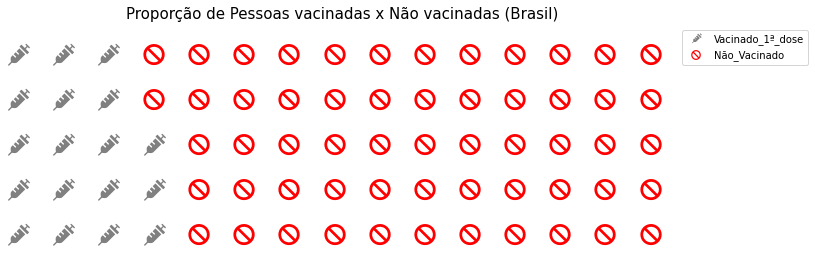



 Vacinado_1ª_dose     51465240.0
Não_Vacinado        160290452.0
dtype: float64 


Vacinado_1ª_dose (%)    24.304065
Não_Vacinado (%)        75.695935
dtype: float64


In [ ]:
#Proporção de vacinação no Brasil

from pywaffle import Waffle

dados = np.array([[df_br.people_vaccinated.max(),211755692-df_br.people_vaccinated.max()]])

health = dict(pd.DataFrame(dados, columns=['Vacinado_1ª_dose','Não_Vacinado']).mean()/211755692*100)

fig= plt.figure(
                FigureClass = Waffle,
                rows = 5,
                columns = 15,
                colors = ['gray','red'] ,
                values = health, icons = ['syringe','ban'], icon_size = 22,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                 icon_legend=True,figsize=(12,8)
                )
plt.title("Proporção de Pessoas vacinadas x Não vacinadas (Brasil)",fontsize=15)
fig.set_tight_layout(False)
plt.show()

print('\n\n',pd.DataFrame(dados, columns=['Vacinado_1ª_dose','Não_Vacinado']).mean(),'\n\n')
print(pd.DataFrame(dados, columns=['Vacinado_1ª_dose (%)','Não_Vacinado (%)']).mean()/211755692*100)

Com os dados estátisticos acima, concluimos que apenas **24% da população brasileira** recebeu pelo menos a 1ªdose da vacina, no entanto ainda existe uma longa fila a ser vacinada com a proporção de **75% da população que ainda espera pela 1ª dose**. Porém ainda que a pessoa tenha recebido a primeira dose, ou não, faz parte do plano de combate a COVID-19 como contramedida de **prioridade Nº1 a conscientização quanto ao distanciamento social, cuidados básicos com hegiene, alcool em gel e o uso de mascára**. Pois uma etapa complementa a outra para o sucesso nesse combate.